              valid_time   latitude  longitude expver      wdir10      si10  \
0    2000-07-01 00:00:00  41.728189    1.89059   prod  110.508080  1.128831   
1    2000-07-01 06:00:00  41.728189    1.89059   prod   27.304752  1.306412   
2    2000-07-01 12:00:00  41.728189    1.89059   prod  198.070847  2.112695   
3    2000-07-01 18:00:00  41.728189    1.89059   prod  164.047226  3.381896   
4    2000-07-02 00:00:00  41.728189    1.89059   prod  112.203125  1.177493   
...                  ...        ...        ...    ...         ...       ...   
2723 2021-07-30 18:00:00  41.728189    1.89059   prod  138.422256  3.753042   
2724 2021-07-31 00:00:00  41.728189    1.89059   prod  138.781281  1.583709   
2725 2021-07-31 06:00:00  41.728189    1.89059   prod  170.547363  0.517328   
2726 2021-07-31 12:00:00  41.728189    1.89059   prod  233.765656  0.584113   
2727 2021-07-31 18:00:00  41.728189    1.89059   prod  147.055344  2.425903   

             r2         t2m  
0     82.880455  289.

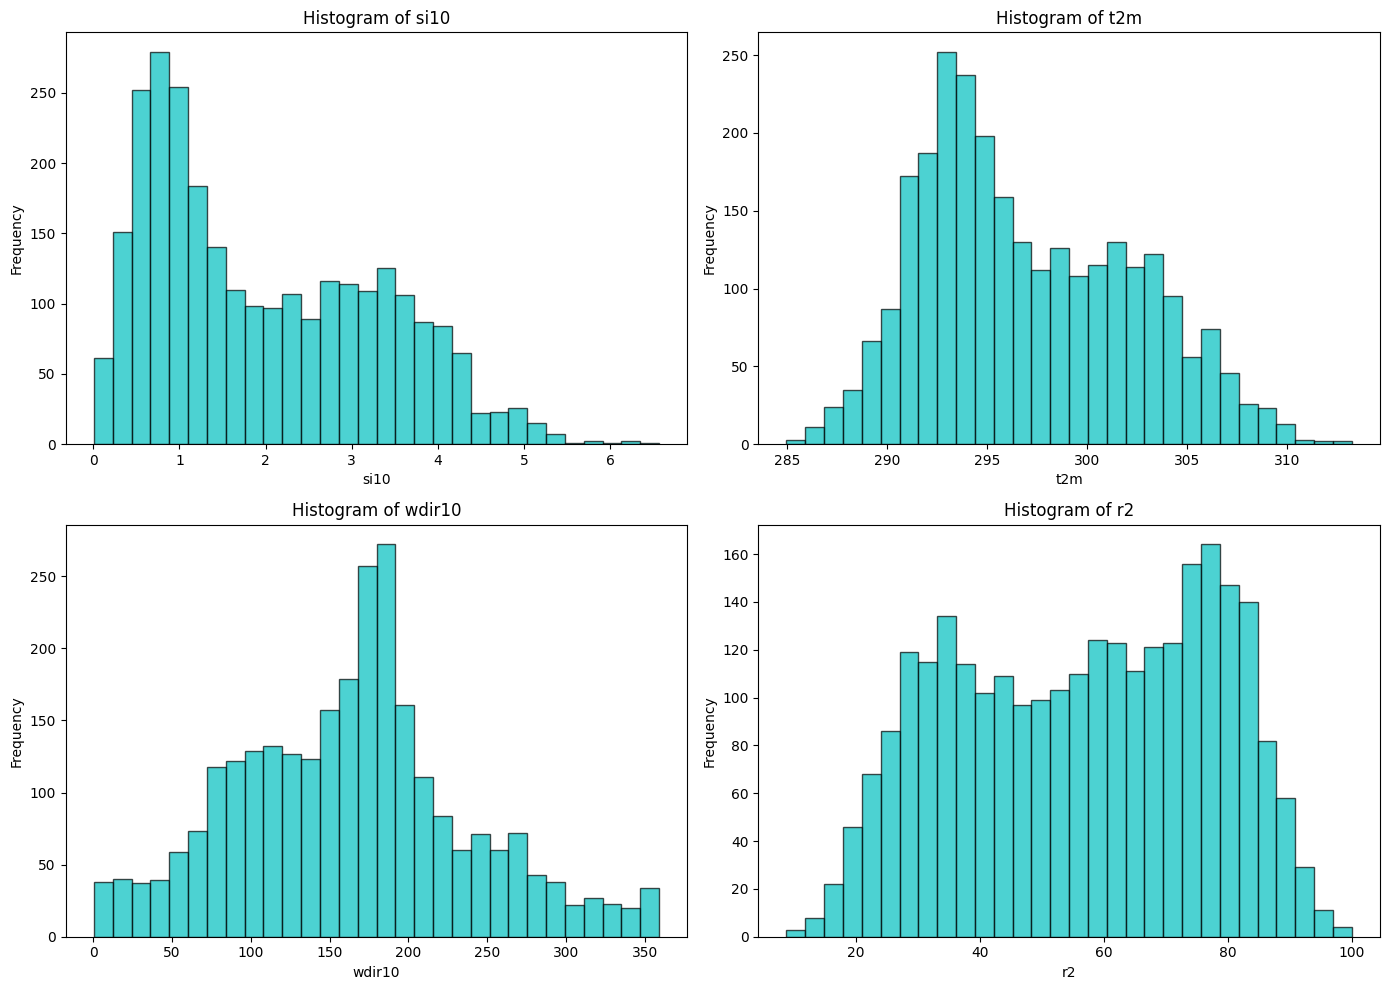

         si10         t2m      wdir10         r2
min  0.008442  284.983582    0.406623   8.843750
max  6.566544  313.219513  359.117218  99.999458
std  1.316776    5.271261   73.715691  20.606153


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data, process it, and convert to DataFrame for a specific lat/lon
def load_and_process_data_to_df(fileinput, lat, lon, month=7):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Calculate the squared distance to each grid point
    lat_diff = (ds['latitude'] - lat)**2
    lon_diff = (ds['longitude'] - lon)**2
    dist = np.sqrt(lat_diff + lon_diff)
    
    # Find the indices of the minimum distance
    y_idx, x_idx = np.unravel_index(dist.argmin(), dist.shape)
    
    # Select data only for the specified month
    monthly_data = ds.sel(valid_time=ds.valid_time.dt.month == month)
    
    # Extract values at the nearest grid point
    data_at_point = monthly_data.isel(x=x_idx, y=y_idx)

    # Convert the data at the nearest grid point to a DataFrame
    df = data_at_point.to_dataframe().reset_index()

    return df

# Function to load and merge multiple files into a single DataFrame
def load_and_merge_files(file_list, lat, lon, month=7):
    data_frames = []
    
    for file in file_list:
        df = load_and_process_data_to_df(file, lat, lon, month)
        data_frames.append(df)
    
    # Concatenate all the data frames into one
    merged_df = pd.concat(data_frames, ignore_index=True)
    
    return merged_df

# Function to plot histograms for the selected parameters
def plot_histograms(df, parameters):
    plt.figure(figsize=(14, 10))
    
    # Loop over the parameters and create subplots
    for i, param in enumerate(parameters, 1):
        plt.subplot(2, 2, i)  # 2 rows, 2 columns for 4 plots
        plt.hist(df[param].dropna(), bins=30, color='c', edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {param}')
        plt.xlabel(param)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Function to calculate statistics for selected parameters
def calculate_statistics(df, parameters):
    stats = {}
    
    for param in parameters:
        min_val = df[param].min()
        max_val = df[param].max()
        std_val = df[param].std()
        
        stats[param] = {
            'min': min_val,
            'max': max_val,
            'std': std_val
        }
    
    return pd.DataFrame(stats)

# Example usage
file_list = [
    '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2000.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2001.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2002.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2003.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2004.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2005.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2006.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2007.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2008.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2009.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2010.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2011.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2012.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2013.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2014.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2015.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2016.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2017.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2018.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2019.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2020.nc', '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2021.nc'
    # Add all 22 file paths here
]

lat = 41.709377863541654
lon = 1.892273844304144

# Load and merge data from all files for July
merged_data = load_and_merge_files(file_list, lat, lon)

# Display the merged DataFrame
print(merged_data)

# Save the merged dataframe to a CSV file
merged_data.to_csv('merged_dataCERA.csv', index=False)

# Plot histograms
parameters_to_plot = ['si10', 't2m', 'wdir10', 'r2']
plot_histograms(merged_data, parameters_to_plot)

# Calculate statistics
parameters_to_analyze = ['si10', 't2m', 'wdir10', 'r2']
statistics = calculate_statistics(merged_data, parameters_to_analyze)

# Display the statistics
print(statistics)